### Exercise 8.1

In [50]:
import re

aa_seq = "MNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLA" +\
    "VADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFT" +\
    "WVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQES" +\
    "ATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAKTSAVYNPVIYIMMNKQFRNCMVTT" +\
    "LCCGKNPLGDDEASTTVSKTETSQVAPA"

matches = re.finditer('(?=(A...A))',aa_seq,)
matchesf = [str(match.group(1)) for match in matches]
matches2 = re.finditer('(?=(A..A))',aa_seq,)
matches2f = [str(match.group(1)) for match in matches2]
matches3 = matchesf + matches2f

print("The amino acid query is 'AXX(X)A'.")
for i in matches3:
    match_text = str(re.search(i,aa_seq))
    intermpos = str(re.sub('^.*span=\(','',match_text))
    intermpos = re.sub('\).*$','',intermpos)
    startpos = re.sub('\,.*','',intermpos)
    endpos = re.sub('^.*\, ','',intermpos)
    print("The amino acid sequence match " + i + " starts at position " + str((int(startpos) + 1)) + " and ends at position " + str((int(endpos))) + ".")

newmatches = re.finditer('(?=([AL]...[AL]))',aa_seq,)
newmatchesf = [str(match.group(1)) for match in newmatches]
newmatches2 = re.finditer('(?=([AL]..[AL]))',aa_seq,)
newmatches2f = [str(match.group(1)) for match in newmatches2]
newmatches3 = newmatchesf + newmatches2f

print("\n" + "The amino acid query is 'ZXX(X)Z', where Z is either A or L.")
for i in newmatches3:
    match_text = str(re.search(i,aa_seq))
    intermpos = str(re.sub('^.*span=\(','',match_text))
    intermpos = re.sub('\).*$','',intermpos)
    startpos = re.sub('\,.*','',intermpos)
    endpos = re.sub('^.*\, ','',intermpos)
    print("The amino acid sequence match " + i + " starts at position " + str((int(startpos) + 1)) + " and ends at position " + str((int(endpos))) + ".")


The amino acid query is 'AXX(X)A'.
The amino acid sequence match ALACA starts at position 164 and ends at position 168.
The amino acid sequence match AKTSA starts at position 295 and ends at position 299.
The amino acid sequence match ACAA starts at position 166 and ends at position 169.
The amino acid sequence match AGVA starts at position 269 and ends at position 272.
The amino acid sequence match AFFA starts at position 292 and ends at position 295.

The amino acid query is 'ZXX(X)Z', where Z is either A or L.
The amino acid sequence match AYMFL starts at position 42 and ends at position 46.
The amino acid sequence match LLIML starts at position 46 and ends at position 50.
The amino acid sequence match LRTPL starts at position 68 and ends at position 72.
The amino acid sequence match LNYIL starts at position 72 and ends at position 76.
The amino acid sequence match LLNLA starts at position 76 and ends at position 80.
The amino acid sequence match AVADL starts at position 80 and ends

### Exercise 8.2

There are 501 A's, 507 C's, 508 G's, and 496 T's in this sequence.


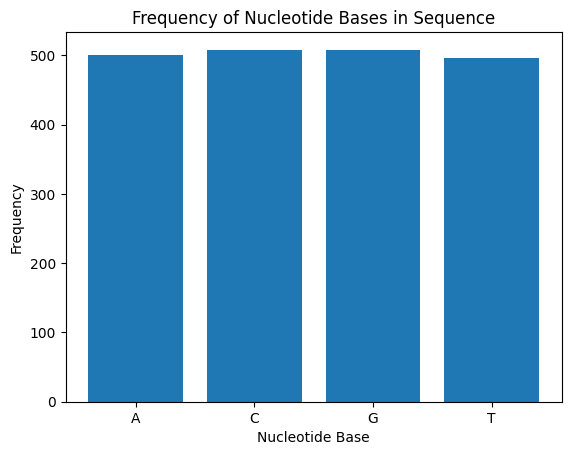

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt 

with open("/srv/dna.txt", "r") as f:
    dnatxt = list(f.read())

acount = 0
ccount = 0
gcount = 0

for i in dnatxt:
    if i == "A":
        acount = acount + 1
    if i == "C":
        ccount = ccount + 1
    if i == "G":
        gcount = gcount + 1

tcount = len(dnatxt) - acount - ccount - gcount

print ("There are " + str(acount) + " A's, " + str(ccount) + " C's, " + str(gcount) + " G's, and " + str(tcount) + " T's in this sequence.")

histdata = [["A", acount], ["C", ccount], ["G", gcount], ["T", tcount]]
histdf = pd.DataFrame(histdata, columns = ["Base", "Count"])

plt.bar(histdf["Base"],histdf["Count"])
plt.xlabel("Nucleotide Base")
plt.ylabel("Frequency")
plt.title("Frequency of Nucleotide Bases in Sequence")
plt.show()

### Exercise 8.3

In [23]:
import urllib
import pandas as pd

from urllib.request import urlopen
genomic_data = pd.read_csv(urlopen("http://lfsc507.github.io/data/virus_miniset0.txt"), sep = "\t")

genomic_data = genomic_data.set_index("Sample")
mycols = list(genomic_data.columns)
col_stds = genomic_data.std()
col_stds = col_stds.tolist()

ncol = len(mycols)
for i in range(0,ncol):
    col_val = round(col_stds[i],2)
    print("The standard deviation of all gene expressions in sample " + mycols[i] + " is " + str(col_val) + ".")
print(" ")

myindex = list(genomic_data.index)
nrow = len(myindex)
genomic_data['Row StD'] = genomic_data.std(axis=1)
row_stds = genomic_data['Row StD'].values.tolist()

for i in range(0,nrow):
    row_val = round(row_stds[i],2)
    print("The standard deviation of the expression in gene " + myindex[i] + " across all samples is " + str(row_val) + ".")

print(geno)

The standard deviation of all gene expressions in sample M-12 is 4.91.
The standard deviation of all gene expressions in sample M-24 is 4.7.
The standard deviation of all gene expressions in sample M-36 is 2.76.
The standard deviation of all gene expressions in sample M-48 is 4.89.
The standard deviation of all gene expressions in sample M+ANDV-12 is 3.97.
The standard deviation of all gene expressions in sample M+ANDV-24 is 4.05.
The standard deviation of all gene expressions in sample M+ANDV-36 is 5.28.
The standard deviation of all gene expressions in sample M+ANDV-48 is 4.26.
The standard deviation of all gene expressions in sample M+SNV-12 is 3.44.
The standard deviation of all gene expressions in sample M+SNV-24 is 3.87.
The standard deviation of all gene expressions in sample M+SNV-36 is 3.26.
The standard deviation of all gene expressions in sample M+SNV-48 is 3.27.
 
The standard deviation of the expression in gene ARG1 across all samples is 3.61.
The standard deviation of the